# Random Walk

### Imports

In [1]:
import numpy as np # for calculations
from matplotlib import pyplot as plt # for plotting
import time # for sleeping
from IPython.display import display, clear_output # for graphing
from typing import Tuple, List # for type hinting

### Class walker

In [ ]:
class Walker(object):
    '''
    
    '''
    x: float # starting x-coordinate
    y: float # starting y-coordinate
    coords: list # stores all x, y coordinates along walked path
    total_steps: int # stores total number of steps taken by a walker
        
    def __init__(self,
                 x: float,
                 y: float
                ) -> None:
        '''
        Initializes global objects
        '''
        self.x, self.y = x, y
        self.coords = [(x, y)]
        self.total_steps = 1
        
    def __repr__(self
                ) -> str:
        '''
        Repr to display walker-object information
        '''
        return 'Walker(x: {}, y: {}, total_steps: {})'.format(self.x, self.y, self.total_steps)
        
    def set_next_step(self,
                      next_x: float,
                      next_y: float
                     ) -> None:
        '''
        Stores next step location
        '''
        self.total_steps += 1
        self.coords.append((next_x, next_y))
        
    def get_x_y(self
               ) -> Tuple[List[float], List[float]]:
        '''
        Returns two lists of total_steps number of x and y co-ordinates
        '''
        return [coords[0] for coords in self.coords], [coords[1] for coords in self.coords]

### Class Random walk

In [19]:
class RandomWalk(object):
    '''
    Calculates and displays the random-path taken by a walker
    '''
    seed: int # seed for reproducability
    n_walkers: int # number of random walkers whose path is to be calculated
    step_size: float # how far a walker can go in one time-step
    
    def __init__(self,
                 n_walkers: int = 100,
                 seed: int = 42,
                 step_size: float = 0.1
                ) -> None:
        '''
        Initializes global objects and sets seed
        '''
        self.n_walkers, self.seed, self.step_size = n_walkers, seed, step_size
        if self.seed != -1:
            np.random.seed(self.seed)
        else:
            # set seed as random
            np.random.seed(np.random.randint(0, 2 ** 31 - 1))
        
    def _get_random_coords(self
                          ) -> Tuple[float, float]:
        '''
        Returns x, y co-ordinates picked randomly from
        a uniform distribution
        '''
        x, y = np.random.uniform(size=2)
        return x, y
    
    def _get_next_step(self,
                       x: float,
                       y: float
                      ) -> Tuple[float, float]:
        '''
        Calculates the next random-step a walker takes
        '''
        alpha = np.random.randint(low=0, high=361) # Get the angle in degrees in which the walker takes step towards
        alpha = (alpha * np.math.pi) / 180 # convert degrees to radians
        next_x = x + (self.step_size * np.math.cos(alpha)) # get next x-co-ordinate
        next_y = y + (self.step_size * np.math.sin(alpha)) # get next y-co-ordinate
        return next_x, next_y
    
    def _get_timesteps(self,
                       max_time: float = 5.0, # maximum time
                       timestep_size: float = 0.1 # take a walk at this frequency
                      ) -> List[float]:
        '''
        Returns an iterable containing one timestep per element
        '''
        return np.arange(0, max_time, timestep_size)
            
    def display(self,
                axes: str = 'on', # if on, shows grid, else does not
                wait: float = 0.5 # sleep time before next step is taken
               ) -> None:
        '''
        Displays the random-walk taken by all the n_walkers
        '''
        walkers = list()
        for i in range(self.n_walkers):
            # initialize all walkers
            x, y = self._get_random_coords()
            walkers.append(Walker(x, y))
            
        for time_step in self._get_timesteps():
            # for each time-step
            
            for walker in walkers:
                # for each walker
                
                latest_x, latest_y = walker.coords[-1] # get previous location
                next_x, next_y = self._get_next_step(latest_x, latest_y) # get next location
                walker.set_next_step(next_x, next_y) # store this new location
                x, y = walker.get_x_y() # get all path co-ordinates
                plt.scatter(x, y) # plot scatter plot of walker positions
                plt.plot(x, y) # connect these points to depict direction
                
            clear_output(wait=True) # clears previous graph when next one is generated
            plt.axis(axes) # to turn-on or turn-off axes
            plt.show() # displays the new graph
            time.sleep(wait) # sleep for wait seconds

### Displaying the path

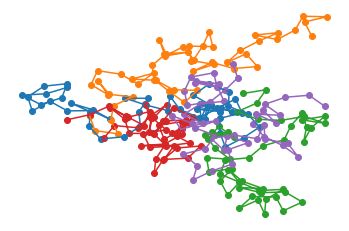

In [21]:
random_walk = RandomWalk(n_walkers=5, seed=-1)
random_walk.display(axes='off')